In [23]:
# Omitir este código
# Rutinas para visualizar puntos y líneas
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import sympy as sp
import math

def angulo(ax,u,v,r,nombre='',fontsize=15):
    alpha_u=math.degrees(math.atan2(u[1],u[0]))
    alpha_v=math.degrees(math.atan2(v[1],v[0]))
    ax.add_patch(Arc((0,0),r,r,0,alpha_u,alpha_v))
    alpha=(alpha_u+alpha_v)/2
    x=r*math.cos(math.radians(alpha))/2
    y=r*math.sin(math.radians(alpha))/2
    if nombre!='':
        ax.text(x,y,nombre,fontsize=fontsize)


def ejes(x0,y0,x1,y1,k=1):
    #fig=plt.figure(figsize=(8,6),dpi=80)
    #ax = plt.Axes(fig,[0.,0.,1.,1.])
    ax = plt.axes([0.,0.,k,k*1.34*(y1-y0)/(x1-x0)])
    ax.set_xlim(x0,x1)
    ax.set_ylim(y0,y1)
    punto2d(ax,(0,0),nombre=r'$\vec{0}$')
    return ax

def ejes3d(x0,x1,y0,y1,z0,z1):
    #fig=plt.figure(figsize=(8,6),dpi=80)
    #ax = plt.Axes(fig,[0.,0.,1.,1.])
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    ax.set_xlim([x0,x1])
    ax.set_ylim([y0,y1])
    ax.set_zlim([z0,z1])
    return ax

def flecha2d(ax,v,sumar=[0,0],nombre='',fontsize=15,**kwargs):
    ax.arrow(float(sumar[0]),float(sumar[1]),float(v[0]),float(v[1]),head_width=0.2,head_length=0.2, length_includes_head=True,**kwargs)
    if nombre!='':
        ax.text(v[0]+sumar[0],v[1]+sumar[1],nombre,fontsize=fontsize)

from mpl_toolkits.mplot3d import Axes3D

def flecha3d(ax,A:sp.Matrix,B:sp.Matrix=None,nombres=None,fontsize=15,**kwargs):#problemas en 2D
    if B==None:
        B=sp.zeros(*A.shape)
    elif A.shape!=B.shape:
        raise ValueError('flechas(ax,A) o flechas(ax,A,B) y A y B son del mismo tamaño')

    if isinstance(nombres,str):
        if A.cols==1:
            nombres=[nombres]
        else:
            nombres=[nombres+str(i) for i in range(A.cols)]
    elif (isinstance(nombres,list)) and (len(nombres)!=A.cols):
        raise ValueError('flechas(ax,A) o flechas(ax,A,n) y n="v" o  len(n)!=A.cols')
    elif not isinstance(nombres,list) and nombres!=None:
        raise ValueError('n es str o list')
        
    if A.rows==2:
        #v=A.col(0)
        #sumar=B.col(0)
        #ax.arrow(float(sumar[0]),float(sumar[1]),float(v[0]),float(v[1]),head_width=0.02,head_length=0.02, length_includes_head=True,**kwargs)
        #if nombre!='':
        #    ax.text(v[0]+sumar[0],v[1]+sumar[1],nombre,fontsize=fontsize)
        ax.quiver(B.row(0),B.row(1),A.row(0),A.row(1),**kwargs)
        if nombres!= None:
            for i in range(A.cols):
                ax.text(A.row(0)[i]+B.row(0)[i],A.row(1)[i]+B.row(1)[i],nombres[i],fontsize=fontsize)
        
    elif A.rows==3:
        #AT=A.T
        ax.quiver(B.row(0),B.row(1),B.row(2),A.row(0),A.row(1),A.row(2),**kwargs)
        if nombres!= None:
            for i in range(A.cols):
                ax.text(A.row(0)[i]+B.row(0)[i],A.row(1)[i]+B.row(1)[i],A.row(2)[i]+B.row(2)[i],nombres[i],fontsize=fontsize)
    else:
        raise ValueError('Sólo imprime matrices de 2 o 3 renglones')


def linea2d(ax,u,v=(0,0),color='k',**kwargs):
    ax.plot((u[0],v[0]),(u[1],v[1]),color)
        
def punto2d(ax,v,nombre='',fontsize=15,color='k',**kwargs):
    ax.scatter(*v,s=20,color=color)
    if nombre!='':
        ax.text(v[0],v[1],nombre,fontsize=fontsize)        
        
def juntar(*columnas):# apilar para col_join
    A=columnas[0]
    for columna in columnas[1:]:
        A=A.row_join(columna)
    return A

def p(v):
    return '('+', '.join([str(ai) for ai in v])+')\u209c'

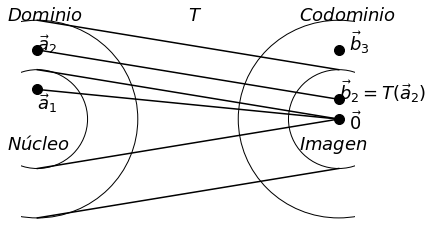

In [24]:
# Omitir este código
# Este código dibuja dos conjuntos anidados
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

puntos=[[3  ,6, 3 , 6,  6],  # x1 x2 x3 x4
        [2.3,2, 2.7,2.2,2.7]]  # y1 y2 y3 y4
ax.scatter(*puntos,s=100,color='k')

lineas=[(3,6),(1.5,2),'k', #(x1,x4),(y1,y4),color
        (3,6),(2.3,2),'k', #(x2,x4),(y2,y4),color
        (3,6),(2.5,2),'k', #(x2,x4),(y3,y4),color
        (3,6),(2.7,2.2),'k', #(x2,x4),(y3,y4),color
        (3,6),(3,2.5),'k', #(x2,x4),(y3,y4),color
        (3,6),(1,1.5),'k', #(x2,x4),(y3,y4),color
       ]
ax.plot(*lineas)


ax.add_artist(plt.Circle((3, 2), 1, fill=False, color='k'))
ax.add_artist(plt.Circle((6,2), 1, fill=False, color='k'))
ax.add_artist(plt.Circle((6,2), 0.5, fill=False, color='k'))
ax.add_artist(plt.Circle((3, 2), 0.5, fill=False,  color='k'))
#ax.add_artist(plt.Circle((0.95, 0.5), 0.01,  color='k'))
ax.text(4.5, 3, r'$T$',{'fontsize': 18})
#ax.text(3.8, 3, r'$A\vec{x}=\vec{0}$',{'fontsize': 18})
ax.text(6.1, 1.9, r'$\vec{0}$',{'fontsize': 18})
ax.text(3, 2.7, r"$\vec{a}_2$",{'fontsize': 18})
ax.text(3, 2.1, r"$\vec{a}_1$",{'fontsize': 18})
ax.text(6., 2.2, r"$\vec{b}_2=T(\vec{a}_2)$",{'fontsize': 18})
ax.text(6.1, 2.7, r"$\vec{b}_3$",{'fontsize': 18})
ax.text(2.7, 1.7, r'$Núcleo$',{'fontsize': 18})
ax.text(5.6, 1.7, r'$Imagen$',{'fontsize': 18})
ax.text(2.7, 3, r'$Dominio$',{'fontsize': 18})
ax.text(5.6, 3, r'$Codominio$',{'fontsize': 18})

ax.axis('off')
plt.show()

# Núcleo e imagen

Sea $T_A:\mathbb{R}^n \rightarrow \mathbb{R}^m$ una transformación matricial, recordemos que el conjunto $\mathbb{R}^n$ se llama el **dominio** de la transformación y el conjunto $\mathbb{R}^m$ se llama el **codominio** de la transformación.

## Núcleo

El **núcleo de $T_A$** (denotado $\text{Nu}(T_A)$) es el conjunto de los vectores $\vec{x}$ que pertenecen al dominio tales que $T_A(\vec{x})=0$.

$\text{Nu}(T_A)=\{\vec{x} \mid T_A(\vec{x})=0 \in \mathbb{R}^n \}$

En la figura anterior el vector $\vec{a}_1$ pertenece al núcleo de $T_A$ porque es transformado en el vector $\vec{0}$, mientras que  el vector $\vec{a}_2$ no.

El núcleo de $T_A$ es lo mismo que:
* El conjunto de vectores $\vec{x}$ que cumplen la ecuación $A\vec{x}=\vec{0}$
* La solución del sistema homogéneo $[A:\vec{0}]$
* El espacio nulo de la matriz $A$

Como el núcleo de $T_A$ es un subespacio del dominio, su dimensión se llama la **nulidad** de $T_A$ y se denota $\nu(T_A)$.

Una transformación $T$ es **inyectiva** si para cada vector  $\vec{y}$ de la <u>imagen,</u> existe un <u>único</u> vector $\vec{x}$ tal que  $T( \vec{x}) = \vec{y}$. 

Decir que una transformación matricial $T_A$ es inyectiva es lo mismo que decir cualquiera de las siguientes afirmaciones:
* $\text{Nu}(T_A)=\{\vec{0}\}$
* El sistema homogéneo $[A:\vec{0}]$ tiene solución única
* $A$ tiene un l-pivote en cada columna
* $\nu(A)=0$
* Las columnas de $A$ son LI.

## Imagen

La **imagen de $T_A$** (denotada $\text{Im}(T_A)$) es el conjunto de vectores $T_A(\vec{x})$ del codominio para los cuales existe un vector $\vec{x}$ en el dominio. 

$\text{Im}(T_A)=\{T_A(\vec{x}) \mid \vec{x} \in \mathbb{R}^n \}$

En la figura anterior el vector $\vec{b}_2$ pertenece a la imagen de $T$ porque existe el vector $\vec{a}_2$ en el dominio tal que $\vec{b}_2=T(\vec{a}_2)$. 

La imagen de $T_A$ es lo mismo que:
* El conjunto de vectores $\vec{y}$ para que cumplen $A\vec{x}=\vec{y}$, para algún vector $x$.
* El espacio columna de la matriz $A$.
* El espacio generado por las columnas de la matriz $A$.

Como la imagen de $T_A$ es un subespacio del codominio, su dimensión se llama el **rango** de $T_A$ y se denota $\rho(T_A)$.


Una transformación $T$ es **sobreyectiva** si para cada vector  $\vec{y}$ del <u>codominio</u> existe algún vector $\vec{x}$ tal que  $T( \vec{x}) = \vec{y}$. 

Decir que una transformación matricial $T_A$ es sobreyectiva es lo mismo que decir cualquiera de las siguientes afirmaciones:
* $\text{Im}(T_A)=\mathbb{R}^m$
* El sistema $[A:\vec{b}]$ es consistente para todo $\vec{b} \in \mathbb{R}^m$
* $A$ tiene un l-pivote en cada <u>renglón</u>
* $\rho(A)=m$
* Las columnas de $A$ son generan $\mathbb{R}^m$.

# Isomorfismo

Una transformación de $\mathbb{R}^n$ en $\mathbb{R}^m$ es **biyectiva** si es inyectiva y sobreyectiva.

Una transformación matricial biyectiva se llama un **isomorfismo**.

Cada una de las siguientes afirmaciones es lo mismo que decir que $T_A$ es un isomorfismo.
* $\text{Im}(T_A)=\mathbb{R}^m$ y $\text{Nu}(T_A)=\{\vec{0}\}$
* El sistema $[A:\vec{b}]$ tiene solución única para todo $\vec{b} \in \mathbb{R}^m$
* $A$ es cuadrada con $n$ l-pivotes
* $\rho(A)=m$ y $\nu(A)=0$
* Las columnas de $A$ son una base de $\mathbb{R}^m$ 
* $A$ es invertible
* $A$ es equivalente a la identidad

# Ejercicio:

In [25]:
nombre='?'
codigo=0

Para las siguientes transformaciones matriciales:

(i) $T_{A1}(\vec{x})=\left[ \matrix{1&2&3 \\ 4&8&6} \right]\left( \matrix{x_0 \\ x_1 \\ x_2} \right)$

(ii) $T_{A2}(\vec{x})=\left[ \matrix{1+a&2\\3&4\\5&6} \right]\left( \matrix{x_0\\x_1} \right)$

(iii) $T_{A3}(\vec{x})=\left[ \matrix{1+b&2&3\\4&5&6\\7&8&0} \right]\left( \matrix{x_0\\x_1\\x_2} \right)$

Halle:
1. el dominio y el codominio 
2. la forma escalón y los pivotes de la matriz respectiva
3. la nulidad ($\nu$) y el rango ($\rho$)
4. la descripción geométrica del núcleo y de la imagen
5. una base del núcleo y una base de la imagen
6. una gráfica de los vectores de la base del núcleo y otra gráfica de los vectores de la base de la imagen
7. si es inyectiva o sobreyectiva o si es un isomorfismo

# Solución (i)

Como la matriz tiene tres columnas, el dominio es de $\mathbb{R}^3$. 

El codominio es de $\mathbb{R}^2$ ya que la matriz tiene dos renglones.

In [26]:
import sympy as sp
A1=sp.Matrix([[ 1,2,3 ],[ 4,8,6]])
A1

Matrix([
[1, 2, 3],
[4, 8, 6]])

2. Encontramos la forma escalón 

In [27]:
M=A1[:,:] # hace una copia de la matriz evitando que ambas variables apunten la misma matriz
M

Matrix([
[1, 2, 3],
[4, 8, 6]])

In [28]:
M[1,:] += -4*M[0,:]
M

Matrix([
[1, 2,  3],
[0, 0, -6]])

In [29]:
matriz_escalon_1=M

La anterior matriz en forma escalón tiene pivotes en las columnas 0 y 2.

3. Como hay una columna sin pivote, $\nu(T_{A1})=1$. Como hay dos pivotes, $\rho(T_{A1})=2$.  

In [30]:
nulidad_1=1

In [31]:
rango_1=2

4. Como  $\nu(T_{A1})=1$, el núcleo es una recta en $\mathbb{R}^3$ (el dominio) que pasa por el origen. Como $\rho(T_{A1})=2$, la imagen es un plano en $\mathbb{R}^2$ (el codominio), es decir es todo $\mathbb{R}^2$.

5. Para encontrar la base de la imagen es suficiente quitar las columnas sin pivote

In [32]:
base_imagen_1 = A1[:,0].row_join(A1[:,2])
base_imagen_1

Matrix([
[1, 3],
[4, 6]])

La base del núcleo son las soluciones particulares básicas del sistema homogéneo $[A:\vec{0}]$, para encontrarlas usamos la matriz escalón.

In [33]:
matriz_escalon_1

Matrix([
[1, 2,  3],
[0, 0, -6]])

$x_0 + 2x_1 + 3x_2 =0$

$-6x_2=0$

Como $x_1$ es una variable libre, se les asigna un parámetro. 

$x_1=t_0$

Ahora se despejan las variables delanteras y se define la solución general 

In [34]:
def solucion_general_1(t0):
    # variables libres
    x1=t0
    
    # variables delanteras
    x2=0
    x0=-3*x2-2*x1
    
    return (x0,x1,x2)
    
solucion_particular_basica_1_t0 = solucion_general_1(1)

solucion_particular_basica_1_t0

(-2, 1, 0)

In [35]:
base_nucleo_1 = sp.Matrix(solucion_particular_basica_1_t0)

base_nucleo_1

Matrix([
[-2],
[ 1],
[ 0]])

6. A continuación, se grafica el vector de la base del núcleo como una flecha 

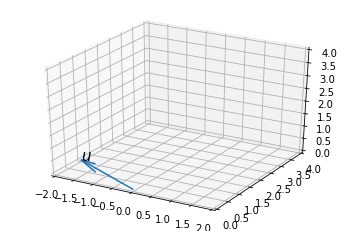

In [36]:
ax=ejes3d(-2,2,0,4,0,4)
flecha3d(ax,base_nucleo_1,nombres=r'$u$')
plt.show()

A continuación, se grafican los vectores de la base de la imagen con flechas 

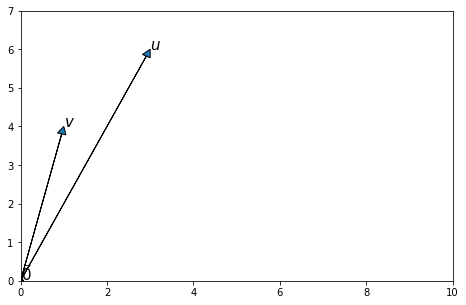

In [37]:
ax=ejes(0,0,10,7)
flecha2d(ax,base_imagen_1[:,0],nombre='$v$') 
flecha2d(ax,base_imagen_1[:,1],nombre='$u$') 
plt.show()

7.

In [38]:
sobreyectiva_1='si'

In [39]:
inyectiva_1='no'

In [40]:
isomorfismo_1='no'

# Solución ii

In [41]:
A2=sp.Matrix()
A2

Matrix(0, 0, [])

In [42]:
matriz_escalon_2=

SyntaxError: invalid syntax (<ipython-input-42-7a88959c4f0e>, line 1)

In [ ]:
nulidad_2=

In [ ]:
rango_2=

In [ ]:
base_imagen_2=

In [ ]:
base_nucleo_2=

In [ ]:
# Gráfica núcleo

In [ ]:
# Gráfica imagen

In [ ]:
sobreyectiva_2='?'

In [ ]:
inyectiva_2='?'

In [ ]:
sobreyectiva_2='?'

# Solución iii

In [ ]:
A3=sp.Matrix()
A3

In [ ]:
matriz_escalon_3=

In [ ]:
nulidad_3=

In [ ]:
rango_3=

In [ ]:
base_imagen_3=

In [ ]:
base_nucleo_3=

In [ ]:
# Gráfica núcleo

In [ ]:
# Gráfica imagen

In [ ]:
sobreyectiva_3='?'

In [ ]:
inyectiva_3='?'

In [ ]:
sobreyectiva_3='?'